In [2]:
import statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error 

In [3]:
df = pd.read_csv("Crops_price.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Commodities(rs/quin)  29 non-null     object 
 1   2002                  29 non-null     object 
 2   2004                  29 non-null     object 
 3   2005                  29 non-null     object 
 4   2006                  29 non-null     float64
 5   2007                  29 non-null     float64
 6   2008                  29 non-null     float64
 7   2009                  29 non-null     float64
 8   2010                  29 non-null     float64
 9   2011                  29 non-null     int64  
 10  2012                  29 non-null     object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.6+ KB


In [5]:
df['Commodities(rs/quin)'] = df['Commodities(rs/quin)'].astype(str)

In [6]:
df['2002'].head(2)

0    550
1    580
Name: 2002, dtype: object

In [7]:
df.head(2)

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550,560,570,580.0,645.0,850.0,950.0,1000.0,1080,1250
1,Paddy (Grade ‘A’),580,590,600,610.0,675.0,880.0,980.0,1030.0,1110,1280


In [8]:
df['Commodities(rs/quin)'].unique()

array(['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ',
       'Jowar (Hybrid)', 'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ',
       'Barley ', 'Gram ', 'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ',
       'Rapeseed/ mustard ', 'Sunflower ', 'Soyabean (Black) ',
       'Soyabean (Yellow) ', 'Safflower ', 'Toria ', 'Copra (milling) ',
       'Copra balls ', 'Sesamum ', 'Niger seed '], dtype=object)

In [9]:
df.isnull().sum()

Commodities(rs/quin)    0
2002                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
dtype: int64

In [10]:
df.columns

Index(['Commodities(rs/quin)', '2002', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

In [11]:
df.head(3)

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550,560,570,580.0,645.0,850.0,950.0,1000.0,1080,1250
1,Paddy (Grade ‘A’),580,590,600,610.0,675.0,880.0,980.0,1030.0,1110,1280
2,Wheat,630,640,650,750.0,1000.0,1080.0,1100.0,1120.0,1285,1350


In [12]:
dfT = df.T

In [13]:
dfT.columns = dfT.iloc[0]

In [14]:
dfT = dfT[1:]

In [15]:
dfT.head(2)

Commodities(rs/quin),Paddy (Common),Paddy (Grade ‘A’),Wheat,Jowar (Hybrid),Jowar (Maldandi),Bajra,Ragi,Maize,Barley,Gram,...,Rapeseed/ mustard,Sunflower,Soyabean (Black),Soyabean (Yellow),Safflower,Toria,Copra (milling),Copra balls,Sesamum,Niger seed
2002,550,580,630,490,...,495,490,490,505,1225,...,1340,1210,805,895,1305,1305,3300,3550,1455,1120
2004,560,590,640,515,...,515,515,525,540,1425,...,1700,1340,900,1000,1550,1665,3500,3750,1500,1180


In [16]:
# dfT.rename(columns = {'Commodities(rs/quin)':'Years'}, inplace = True)

In [17]:
dfT.head(2)

Commodities(rs/quin),Paddy (Common),Paddy (Grade ‘A’),Wheat,Jowar (Hybrid),Jowar (Maldandi),Bajra,Ragi,Maize,Barley,Gram,...,Rapeseed/ mustard,Sunflower,Soyabean (Black),Soyabean (Yellow),Safflower,Toria,Copra (milling),Copra balls,Sesamum,Niger seed
2002,550,580,630,490,...,495,490,490,505,1225,...,1340,1210,805,895,1305,1305,3300,3550,1455,1120
2004,560,590,640,515,...,515,515,525,540,1425,...,1700,1340,900,1000,1550,1665,3500,3750,1500,1180


In [18]:
dfT.columns

Index(['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ', 'Jowar (Hybrid)',
       'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ', 'Barley ', 'Gram ',
       'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ', 'Rapeseed/ mustard ',
       'Sunflower ', 'Soyabean (Black) ', 'Soyabean (Yellow) ', 'Safflower ',
       'Toria ', 'Copra (milling) ', 'Copra balls ', 'Sesamum ',
       'Niger seed '],
      dtype='object', name='Commodities(rs/quin)')

In [19]:
dfT.index

Index(['2002', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012'],
      dtype='object')

In [20]:
cols = ['Paddy (Common) ', 'Paddy (Grade ‘A’) ', 'Wheat ', 'Jowar (Hybrid)',
       'Jowar (Maldandi)', 'Bajra', 'Ragi', 'Maize ', 'Barley ', 'Gram ',
       'Masur', 'Arhar ', 'Moong ', 'Urad ',
       'Sugarcane (Statutory minimum price) a', 'Cotton F-414/H-777 ',
       'Cotton H-4 750 ', 'Groundnut ', 'Jute(TD-5) ', 'Rapeseed/ mustard ',
       'Sunflower ', 'Soyabean (Black) ', 'Soyabean (Yellow) ', 'Safflower ',
       'Toria ', 'Copra (milling) ', 'Copra balls ', 'Sesamum ',
       'Niger seed ']
dfT[cols] = dfT[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [21]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2002 to 2012
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Paddy (Common)                         10 non-null     float64
 1   Paddy (Grade ‘A’)                      10 non-null     float64
 2   Wheat                                  10 non-null     float64
 3   Jowar (Hybrid)                         10 non-null     float64
 4   Jowar (Maldandi)                       7 non-null      float64
 5   Bajra                                  10 non-null     float64
 6   Ragi                                   10 non-null     float64
 7   Maize                                  10 non-null     float64
 8   Barley                                 10 non-null     float64
 9   Gram                                   10 non-null     float64
 10  Masur                                  9 non-null      float64
 11  Arhar   

In [22]:
# plt.plot(x = dfT.index , y = dfT['Paddy (Common) '].values)
# plt.x_label("Years")
# plt.y_label("Paddy Prices")
# plt.title('Line Plot of (Paddy Prices with Years)')

In [23]:
dfT.isnull().sum()

Commodities(rs/quin)
Paddy (Common)                           0
Paddy (Grade ‘A’)                        0
Wheat                                    0
Jowar (Hybrid)                           0
Jowar (Maldandi)                         3
Bajra                                    0
Ragi                                     0
Maize                                    0
Barley                                   0
Gram                                     0
Masur                                    1
Arhar                                    0
Moong                                    0
Urad                                     0
Sugarcane (Statutory minimum price) a    0
Cotton F-414/H-777                       0
Cotton H-4 750                           0
Groundnut                                0
Jute(TD-5)                               0
Rapeseed/ mustard                        0
Sunflower                                0
Soyabean (Black)                         0
Soyabean (Yellow)                

In [24]:
dfT['Masur'] = dfT['Masur'].fillna(dfT['Masur'].mean())
dfT['Toria '] = dfT['Toria '].fillna(dfT['Toria '].mean())
dfT['Jowar (Maldandi)'] = dfT['Jowar (Maldandi)'].fillna(dfT['Jowar (Maldandi)'].mean())

In [25]:
dfT.index.name = 'year'

In [26]:
dfT.index.name

'year'

In [28]:
# plt.plot(x = dfT.index, y = dfT['Paddy (Common) '])

Text(0.5, 1.0, 'plot of prices of paddy with time')

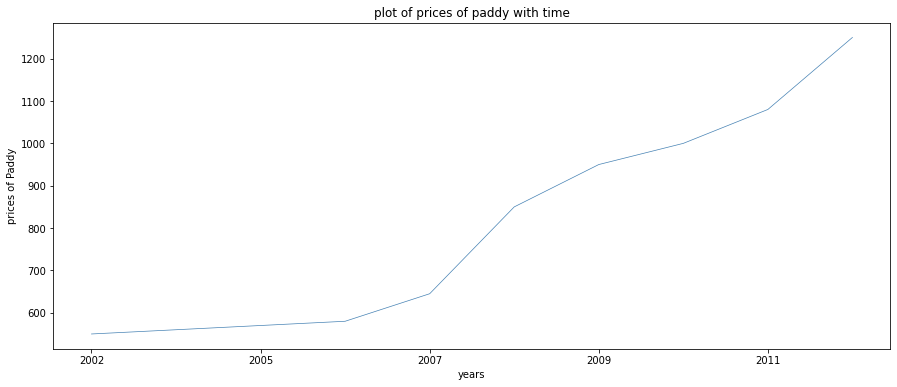

In [29]:
#plot

dfT['Paddy (Common) '].plot(color='steelblue', linewidth=0.7, figsize=(15,6))
plt.xlabel('years')
plt.ylabel("prices of Paddy")
plt.title("plot of prices of paddy with time")

In [30]:
dfT['SMA_5_years'] = dfT['Paddy (Common) '].rolling(5, min_periods=1).mean()

In [31]:
dfT['SMA_5_years']

year
2002     550.0
2004     555.0
2005     560.0
2006     565.0
2007     581.0
2008     641.0
2009     719.0
2010     805.0
2011     905.0
2012    1026.0
Name: SMA_5_years, dtype: float64

Text(0.5, 1.0, 'plot of prices of paddy with time')

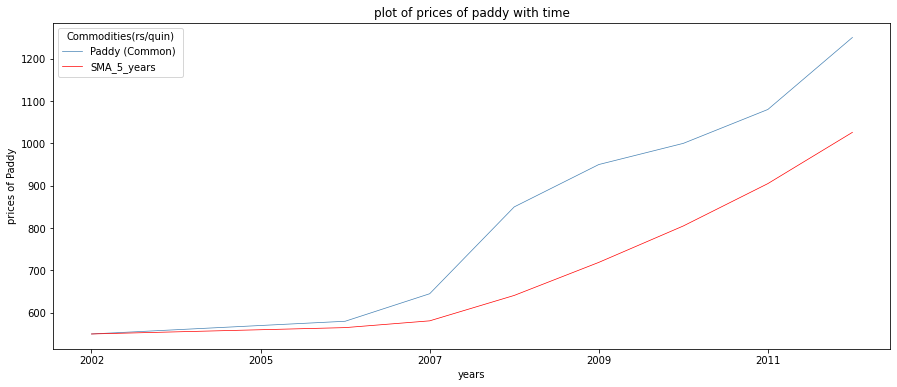

In [32]:
colors = ['steelblue','red']
dfT[['Paddy (Common) ','SMA_5_years']].plot(color = colors, linewidth=0.7, figsize=(15,6))
plt.xlabel('years')
plt.ylabel("prices of Paddy")
plt.title("plot of prices of paddy with time")

In [33]:
# smoothing exponential
#SARIMA
#VAR
#SARIMAX
#VARIMAX

In [34]:
## Autoregression
from statsmodels.tsa.ar_model import AutoReg

X = dfT.values
train, test = dfT[:5], dfT[5:]

In [40]:
# AutoReg(X, lags=[1,2,5])

In [42]:
temp_df = pd.read_csv("sample_min_temp.csv")

In [43]:
temp_df.head(2)

,Unnamed: 0,Date,Temp
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9


In [44]:
temp_df.columns

Index(['Unnamed: 0', 'Date', 'Temp'], dtype='object')

In [47]:
temp_df = temp_df.iloc[:,1:]

In [49]:
temp_df.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [51]:
temp_df.shape

(3650, 2)

### Auto reg for crop


In [53]:
from statsmodels.graphics.tsaplots import plot_acf

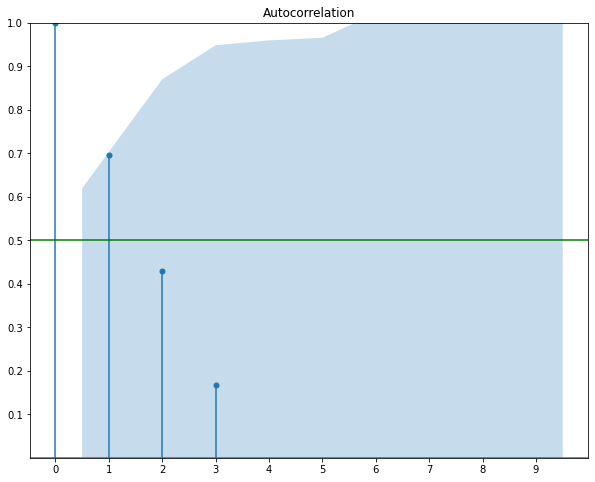

In [64]:
# finding the corealations and understanding the lags relations

fig, ax = plt.subplots(figsize=(10,8))
plot_acf(dfT['Paddy (Common) '], lags=9, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [96]:
dfT.shape

(10, 30)

In [103]:
print(X_crop)
print(Y_crop)

year
2002    550.0
2004    560.0
2005    570.0
2006    580.0
2007    645.0
Name: Paddy (Common) , dtype: float64
year
2008     850.0
2009     950.0
2010    1000.0
2011    1080.0
2012    1250.0
Name: Paddy (Common) , dtype: float64


### Algo using the temp dataset

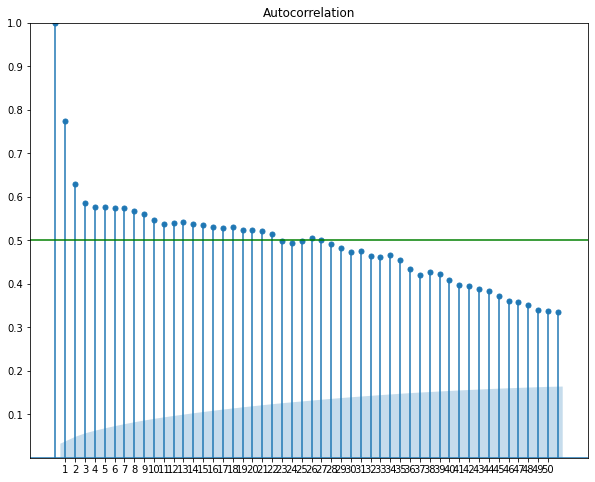

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
plot_acf(temp_df['Temp'], lags=51, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [82]:
temp_df_train = temp_df['Temp'][:-5]
temp_df_test = temp_df['Temp'][-5:]

In [107]:
# !pip install statsmodels==0.13.1

In [88]:
diff = []
model = AutoReg(temp_df_train, lags=22).fit()
forecasts = model.forecast(5).tolist()

test_list = temp_df_test.tolist()
for i in range(len(forecasts)):
    difference = forecasts[i] - test_list[i]
    diff.append(difference)

C:\Users\cosmo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  


In [92]:
mean_squared_error(test_list, forecasts)

1.1819584715502789

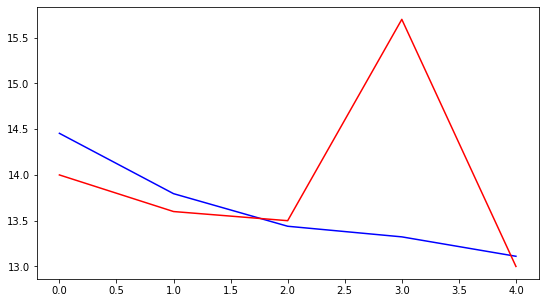

In [111]:
fig,ax = plt.subplots(figsize=(9,5))
plt.plot(forecasts,color='blue')
plt.plot(test_list,color='red')
plt.show()

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip uninstall statsmodels

In [ ]:
!pip install pandas